## Module 4 : Article data for Emotion Recognition

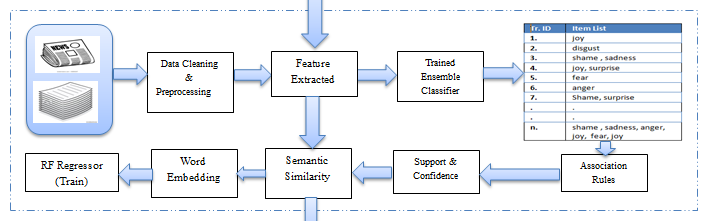

In [1]:
from PIL import Image
Image.open("arc_3.png")

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from nltk.tokenize import word_tokenize
import re
import nltk
#http://rasbt.github.io/mlxtend/
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

import glob
from bs4  import  BeautifulSoup
from nltk.corpus import wordnet as wn

## 1.Loading the News Articles Data

In [4]:
def getData(txtFile):
    para=[]
    soup = BeautifulSoup(txtFile)
    text=soup.get_text()
    stext=text.split('Reuter')
    for t in stext:
        para.append(t)
    return para

In [7]:
ind=0
AllPara=[]
#list_of_files = glob.glob('reut2-/*.sgm')           # create the list of file
list_of_files = []
for x in ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21"]:
    list_of_files.append("data/news_article/reut2-0" + x + ".sgm")                   #https://github.com/stammatime/DevProject1/blob/master/main.py
    
for file_name in list_of_files:
    dataFI = open(file_name, 'r')
    para=getData(dataFI)
    AllPara.extend(para)
    ind+=1
    dataFI.close()
    #if ind>=1:
       # break
    
print('Total files %s read ',(ind))

Total files %s read  22


In [8]:
len(AllPara)

16252

In [9]:
import pickle
with open('output_files/ReutersData', 'wb') as f:
    pickle.dump(AllPara, f)

In [12]:
import pickle
with open('output_files/ReutersData', 'rb') as f:
    AllPara = pickle.load(f)

In [13]:
len(AllPara)

16252

## 2. Preprocessing

In [15]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)      # replace won't with "will not"
    phrase = re.sub(r"can\'t", "can not", phrase)      # replace can or cant with 'can not'
    phrase = re.sub(r"n\'t", " not", phrase)           # replece n with 'not'
    phrase = re.sub(r"\'re", " are", phrase)           # replace re with 'are'
    phrase = re.sub(r"\'s", " is", phrase)             # replace s with 'is'
    phrase = re.sub(r"\'d", " would", phrase)          # replace 'd' with 'would'
    phrase = re.sub(r"\'ll", " will", phrase)          # replace 'll with 'will'
    phrase = re.sub(r"\'t", " not", phrase)            # replace 't' with 'not'
    phrase = re.sub(r"\'ve", " have", phrase)          # replace ve with 'have'
    phrase = re.sub(r"\'m", " am", phrase)             # replace 'm with 'am'
    return phrase

In [16]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
#print(stopwords)
len(stopwords)

179

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from collections import Counter 

p_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text_data):
    preprocessed_text = []             
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)           #calling funcion for each sentence
        #print("1st sent" , sent)
        sent = sent.replace('\\r', ' ')         # replace line terminator with space
        sent = sent.replace('\\n', ' ')         # replace new line charactor with space
        sent = sent.replace('\\"', ' ')         
        sent = re.sub('[^A-Za-z]+', ' ', sent)  # remove anything that is not letter
        sent = ''.join(p_stemmer.stem(token) for token in sent )
        sent = ''.join(lemmatizer.lemmatize(token) for token in sent )
        sent  = ' '.join(e for e in sent.split() if len( Counter(e)) > 2 )
        #sent = lstr(emmatize_text(sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords ) # checking for stop words
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [18]:
preprocessed_paragraph = []
for ind in range(len(AllPara)):
    text = AllPara[ind].split("\n")
    pre_text = preprocess_text(text)
    processed_lst = []
    
    for w in pre_text:
        if len(w.split(' '))>3:
            processed_lst.append(w)
    preprocessed_paragraph.append(processed_lst)

100%|██████████| 26/26 [00:00<00:00, 3250.43it/s]


100%|██████████| 28/28 [00:00<?, ?it/s]


100%|██████████| 23/23 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:00<00:00, 3499.63it/s]


100%|██████████| 26/26 [00:00<00:00, 3251.30it/s]


100%|██████████| 23/23 [00:00<00:00, 2875.47it/s]


100%|██████████| 105/105 [00:00<00:00, 4909.01it/s]


100%|██████████| 9/9 [00:00<00:00, 1125.05it/s]


100%|██████████| 82/82 [00:00<00:00, 2902.85it/s]


100%|██████████| 29/29 [00:00<00:00, 3628.07it/s]


100%|██████████| 23/23 [00:00<00:00, 2898.45it/s]


100%|██████████| 41/41 [00:00<00:00, 2562.88it/s]


100%|██████████| 8/8 [00:00<00:00, 1000.13it/s]


100%|██████████| 27/27 [00:00<00:00, 3375.45it/s]


100%|██████████| 28/28 [00:00<00:00, 2477.91it/s]


100%|██████████| 53/53 [00:00<00:00, 14088.23it/s]


100%|██████████| 44/44 [00:00<00:00, 5482.42it/s]


100%|██████████| 30/30 [00:00<00:00, 2121.91it/s]


100%|██████████| 34/34 [00:00<00:00, 3016.46it/s]


100%|██████████| 29/29 [00:00<00:00, 3578.23it/s]


100%|██████████| 8/8 [00:00<00:00, 880.53it/s]


100%|██████████| 40/40 [00:00<00:00, 4924.05it/s]


100%|██████████| 28/28 [00:00<00:00, 1354.61it/s]


100%|██████████| 29/29 [00:00<00:00, 3100.00it/s]


100%|██████████| 55/55 [00:00<00:00, 4032.70it/s]


100%|██████████| 37/37 [00:00<00:00, 1692.16it/s]


100%|██████████| 23/23 [00:00<?, ?it/s]


100%|██████████| 169/169 [00:00<00:00, 4115.79it/s]


100%|██████████| 25/25 [00:00<00:00, 3042.61it/s]


100%|██████████| 28/28 [00:00<00:00, 3213.85it/s]


100%|██████████| 25/25 [00:00<00:00, 1551.38it/s]


100%|██████████| 38/38 [00:00<00:00, 4750.77it/s]


100%|██████████| 23/23 [00:00<00:00, 2874.87it/s]


100%|██████████| 33/33 [00:00<00:00, 4125.30it/s]


100%|██████████| 46/46 [00:00<00:00, 5032.95it/s]


100%|██████████| 27/27 [00:00<00:00, 3374.74it/s]


100%|██████████| 22/22 [00:00<?, ?it/s]


100%|██████████| 82/82 [00:00<00:00, 3417.08it/s]


100%|██████████| 101/101 [00:00<00:00, 3750.19it/s]


100%|██████████| 29/29 [00:00<00:00, 4150.51it/s]


100%|██████████| 24/24 [00:00<00:00, 3000.75it/s]


100%|██████████| 180/180 [00:00<00:00, 9709.66it/s]


100%|██████████| 62/62 [00:00<00:00, 3967.70it/s]


100%|██████████| 28/28 [00:00<00:00, 3491.10it/s]


100%|██████████| 29/29 [00:00<00:00, 3876.81it/s]


100%|██████████| 53/53 [00:00<?, ?it/s]


100%|██████████| 28/28 [00:00<00:00, 3500.25it/s]


100%|██████████| 22/22 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<?, ?it/s]


In [19]:
import pickle
with open('output_files/preprocessed_paragraph', 'wb') as f:
    pickle.dump(preprocessed_paragraph, f)

In [2]:
import pickle
with open('output_files/preprocessed_paragraph', 'rb') as f:
    preprocessed_paragraph = pickle.load(f)

In [3]:
len(preprocessed_paragraph)

16252

In [4]:
# sample preprocessed graph 
preprocessed_paragraph[0]

['salvador feb showers continued throughout week',
 'bahia cocoa zone alleviating drought since early',
 'january improving prospects coming temporao',
 'although normal humidity levels restored',
 'comissaria smith said weekly review',
 'dry period means temporao late year',
 'arrivals week ended february bags',
 'kilos making cumulative total season',
 'mln stage last year seems',
 'cocoa delivered earlier consignment included',
 'comissaria smith said still doubt',
 'much old crop cocoa still available harvesting',
 'practically come end total bahia crop estimates',
 'around mln bags sales standing almost mln',
 'hundred thousand bags still hands farmers',
 'doubts much cocoa would fit',
 'export shippers experiencing dificulties',
 'obtaining bahia superior certificates',
 'view lower quality recent weeks farmers',
 'sold good part cocoa held consignment',
 'comissaria smith said spot bean prices rose',
 'cruzados per arroba kilos',
 'bean shippers reluctant offer nearby shipment',

In [5]:
len(preprocessed_paragraph[0])

46

## 3. loading the enseble classifier model from isear data 

In [5]:
from sklearn.externals import joblib
eclf = joblib.load("saved_model/eclf_ML_Model_.pkl")  # loading the enseble classifier model from isear data 
vectorizer_sit = joblib.load('saved_model/vectorizer_sit.pkl')

### 3.1 sample paragraph : emotion retrieved 

In [6]:
print("paragraph:",preprocessed_paragraph[5])
preprocessed_txt = vectorizer_sit.transform(preprocessed_paragraph[5]).toarray()
print("Shape of matrix data after one hot encoding : ",preprocessed_txt.shape)
y_predicted = eclf.predict(preprocessed_txt)
y_predicted

paragraph: ['national average prices farmer owned reserve', 'washington feb agriculture department', 'reported farmer owned reserve national five day average', 'price february follows dlrs sorghum cwt', 'natl loan release call', 'avge rate level price price', 'natl loan release call', 'avge rate level price price', 'reserves matured level reflects', 'grain entered oct feedgrain july', 'wheat level wheat barley', 'corn sorghum level covers wheat entered', 'january rates dlrs per cwt lbs']
Shape of matrix data after one hot encoding :  (13, 6450)


array(['joy', 'sadness', 'joy', 'shame', 'guilt', 'shame', 'guilt',
       'shame', 'guilt', 'sadness', 'guilt', 'joy', 'joy'], dtype=object)

### 3.2 Emotion prediction on whole preprocessed paragraphs

In [45]:
ind = 183
for proctxt in preprocessed_paragraph:
    ind+=1
    try:
        preprocessed_txt = vectorizer_sit.transform(proctxt).toarray()
        print("Shape of matrix data after one hot encoding : ",preprocessed_txt.shape)
        y_predicted = eclf.predict(preprocessed_txt)
        
        with open("output_files/article_predicted.txt", "a+") as oput: # saving the data in text file as Transaction Id and Itemset a/c to AR Rules
            oput.write("  ")
            oput.write(f'\n{ind}\t')                      
            for p in y_predicted:                   # to the len(predict) values creating the dataframe to store index and 
                oput.write(f'{p +" "}')             # predicted value
                #f.write("trnId \t Item list")
            oput.close()
    except:
        print("An exception occurred")

Shape of matrix data after one hot encoding :  (10, 6450)
Shape of matrix data after one hot encoding :  (28, 6450)
Shape of matrix data after one hot encoding :  (2, 6450)
Shape of matrix data after one hot encoding :  (6, 6450)
Shape of matrix data after one hot encoding :  (8, 6450)
Shape of matrix data after one hot encoding :  (7, 6450)
Shape of matrix data after one hot encoding :  (19, 6450)
Shape of matrix data after one hot encoding :  (8, 6450)
Shape of matrix data after one hot encoding :  (34, 6450)
Shape of matrix data after one hot encoding :  (16, 6450)
Shape of matrix data after one hot encoding :  (9, 6450)
Shape of matrix data after one hot encoding :  (11, 6450)
Shape of matrix data after one hot encoding :  (22, 6450)
Shape of matrix data after one hot encoding :  (2, 6450)
Shape of matrix data after one hot encoding :  (5, 6450)
Shape of matrix data after one hot encoding :  (9, 6450)
Shape of matrix data after one hot encoding :  (11, 6450)
Shape of matrix data af